# Beam deflection

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of Computational and Data Sciences

Penn State University

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

In [4]:
#Do not change this cell. It is for setting things up.

#make plots inline
%matplotlib inline

#import the preamble in the parent directory
import sys
sys.path.append("../../")
from preamble import *

In [5]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

## Introduction
Beams are used widely structure designs to carry load. In this example, a simply supported beam is under a uniformly distributed load as shown below. 

<img src="beam.png" width="400"/>

<h3 align="center">Figure 1. A simply supported beam under a uniformly distributed load.</h3> 

The equation of the deflection curve can be derived from the deflection equation. The deflection curve has the form of
\begin{equation}
 \delta = -\frac{wx}{24 EI} \left(L^3-2Lx^2 + x^3\right) 
\end{equation}
where $w$ is load per unit length (lbf or kN/m), $x$ is the coordinate, $E$ is the modulus of elasticity (psi or MPa), $I$ is the second moment of area (in$^4$ or mm$^4$), $L$ is the length of the beam, and $\delta$ is the deflection (in or m). Note that $\delta$ is positive if it is upward.

The maximum deflection which should be 
\begin{equation}
\delta_{max} = \frac{5wL^3}{384EI}
\end{equation}

In the following example, the parameters have the following values:
- $L$ = 1 m
- $w$ = 1 kN/m
- $E$ = 200 MPa
- $I$ = 800000 mm$^4$

First we will plot the deflection $\delta$ as a function of $x$. Then we will find at what location the deflection has a value of 0.04 m. This is essentially to solve for the roots of the fourth-order polynomial in the equation above.  

The example shown here may not be complex enough to warrant the use of computing method. Analytical solution exist. However, for more complicated load distribution, analytical solutions do not exisit and computing methods are needed. 


The location of the specified deflection with the Bisection method:
x =  0.16131913661956787


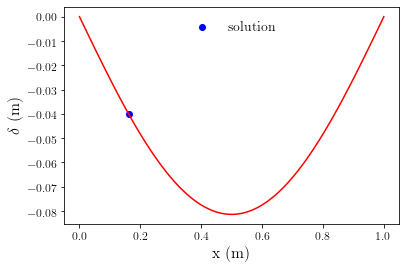

Done!


In [12]:
import matplotlib.pyplot as plt 
import numpy as np 

plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

#a function return the sign of x
def sgn(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

#bisect the range (a, b) based on the signs
#of f(a), f(b) and f((a+b)/2)
def bisect(f,a,b,L,w,E,I,delta):
    fa = f(a,L,w,E,I,delta)
    fb = f(b,L,w,E,I,delta)
    p = (a+b)/2.0
    fp = f(p,L,w,E,I,delta)
    if sgn(fa) == sgn(fp):
        return p, b
    else:
        return a, p

#call the bisection method for n iterations
def bisection_iterations(f,L,w,E,I,delta,a,b,eps,Nmax):
    #iteration number
    n = 0
    xr_old = (a+b)/2.0
    eps_r = 0.0
    while True:
        n = n + 1
        
        if(n > Nmax):
            print("Maximum iteration number reached!")
            break;
            
        a,b = bisect(f,a,b,L,w,E,I,delta)
        #calculate relative error
        xr_new = (a+b)/2.0
        eps_r = abs((xr_new-xr_old)/xr_new)*100
        #print("Iteration %d: eps_r = %.3f" % (n, eps_r))
        if(eps_r < eps): 
            break;
        else: 
            xr_old = xr_new
        
    return ((a+b)/2.0),n

def f(x,L,w,E,I,delta):
    return delta+w*x/24/E/I*(L**3-2*L*x**2+x**3)


#define variables
L = 1 # m
w = 1000 # N/m
E = 200E6 # Pa
I = 800000E-12 # m$^4$

delta = -0.04 # m; desired deflection. Note the negative sign

#reasonable bounds for the solution
a = 0.0
b = 0.5

#
eps = 1e-4

Nmax = 100


#plot the deflection function
x_plot = np.linspace(0,L,100) # 100 linearly spaced numbers

delta_plot = delta - f(x_plot,L,w,E,I,delta)

#line plot
plt.plot(x_plot, delta_plot, color='red')

x,n = bisection_iterations(f,L,w,E,I,delta,a,b,eps,Nmax)

print("The location of the specified deflection with the Bisection method:")
print("x = ", x)

#plot the found solution
plt.scatter(x, delta, color='blue', marker = 'o', label='solution')

#set x and y axes label and font size
plt.xlabel('x (m)',fontsize=16)
plt.ylabel('$\delta$ (m)',fontsize=16)

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

#show legend, set its location, font size, and turn off the frame
plt.legend(loc='upper center',fontsize=14,frameon=False)

plt.show()

print("Done!")